Epoch 1/250


c:\Users\logan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2554 - val_loss: 1.2735
Epoch 2/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 1.2530 - val_loss: 1.2747
Epoch 3/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 1.2981 - val_loss: 1.2665
Epoch 4/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 1.2106 - val_loss: 1.2693
Epoch 5/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 1.1434 - val_loss: 1.2722
Epoch 6/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 1.1640 - val_loss: 1.2616
Epoch 7/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - loss: 1.2651 - val_loss: 1.2773
Epoch 8/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 1.2357 - val_loss: 1.2617
Epoch 9/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 1.2289 - val_loss: 1.2630
Epoch 10/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 1.1412 - val_loss: 1.2642
Epoch 11/250
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 1.1998 - val_loss: 1.2614
Epoch 12/250
131/131 ━━━━━━━━━━━━

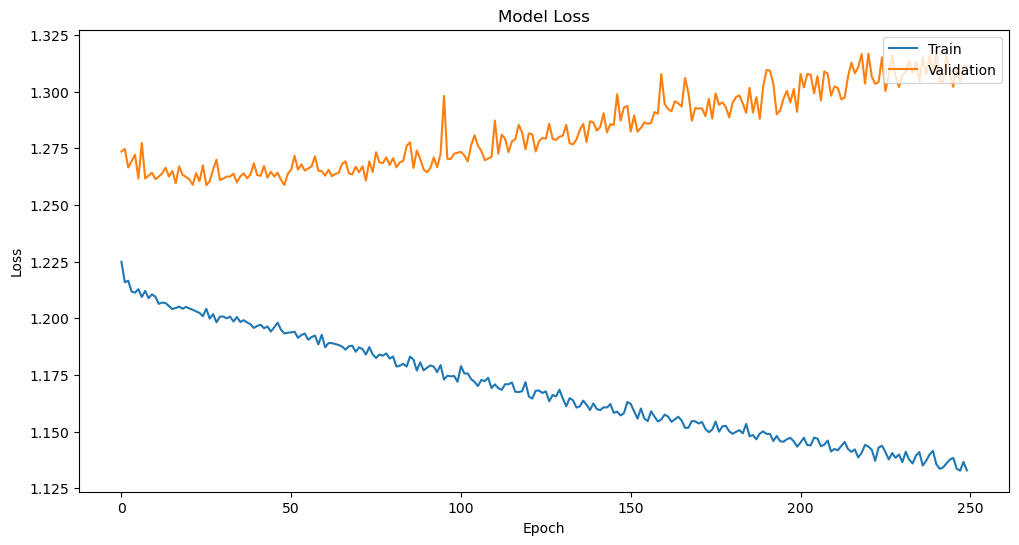

In [4]:
#LOGAN KELSCH
#TEST NN 1

#IMPORT LIBRARIES-------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#LOAD DATA FROM CSV-------------------------------------------------------
# KDdBSV-15-30 - fullK, fullD, diffKD, overBought, overSold, Volume, 15mSD, 30mSD

# Load the dataset
data = pd.read_csv('ES5m30d.csv')
#TESTING FIRST FOR 15 MINUTE TRADES
data = data.drop(columns='30mSD')

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

#PROCESS THE DATA-------------------------------------------------------

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#BUILD THE NEURAL NETWORK MODEL-------------------------------------------------------

def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#TRAIN THE MODEL WITH CUSTOMIZABLE EPOCHS-------------------------------------------------------

epochs = 250

model = build_model(X_train.shape[1])
history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.4, verbose=1)

#EVALUATE THE MODEL AND VISUALIZE RESULTS-------------------------------------------------------

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Save the model
model.save('my_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('my_model.h5')